In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/PlantVillage


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)


In [ ]:
class_names = dataset.class_names
class_names


In [ ]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [ ]:
# SPLITING INTO TRAIN,TEST AND VALIDATION
train_size = 0.8
len(dataset)*train_size
train_ds = dataset.take(54)
test_val_ds = dataset.skip(54)
val_size = 0.1
len(dataset)*val_size
val_ds = test_val_ds.take(6)
test_ds = test_val_ds.skip(6)


In [ ]:
resizing_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1/255)
])


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [ ]:

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
def VGGupdated(input_tensor=None,classes=2):

    img_rows, img_cols = 256, 256   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model
model = VGGupdated(classes = 3)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)


In [ ]:
model.fit(
   train_ds,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/10
51/51 [==============================] - 153s 2s/step - loss: 229.9018 - accuracy: 0.5650
Epoch 2/10
51/51 [==============================] - 26s 496ms/step - loss: 0.9038 - accuracy: 0.6164
Epoch 3/10
51/51 [==============================] - 26s 505ms/step - loss: 0.8768 - accuracy: 0.6219
Epoch 4/10
51/51 [==============================] - 26s 511ms/step - loss: 0.8767 - accuracy: 0.6275
Epoch 5/10
51/51 [==============================] - 27s 517ms/step - loss: 0.8759 - accuracy: 0.6262
Epoch 6/10
51/51 [==============================] - 27s 517ms/step - loss: 0.8747 - accuracy: 0.6262
Epoch 7/10
51/51 [==============================] - 27s 514ms/step - loss: 0.8721 - accuracy: 0.6262
Epoch 8/10
51/51 [==============================] - 26s 510ms/step - loss: 0.8750 - accuracy: 0.6262
Epoch 9/10
51/51 [==============================] - 27s 518ms/step - loss: 0.8721 - accuracy: 0.6262
Epoch 10/10
51/51 [==============================] - 27s 521ms/step - loss: 0.8796 - accura

In [ ]:
score = model.evaluate(train_ds)


51/51 [==============================] - 9s 165ms/step - loss: 0.8702 - accuracy: 0.6262


In [ ]:
!pip install keras-vis
!pip install tf-keras-vis tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import Model
import numpy as np
import imutils
import cv2


In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):

        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
      for layer in reversed(self.model.layers):
        if len(layer.output.shape) == 4:
            return layer.name
      raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):

        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])


        with tf.GradientTape() as tape:

            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

 
        grads = tape.gradient(loss, convOutputs)
       castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]


        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))


        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")


        return heatmap
    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):

        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)
image = train_ds.take(1)



In [ ]:
pip install opencv-python tensorflow numpy


1/1 [==============================] - 0s 181ms/step


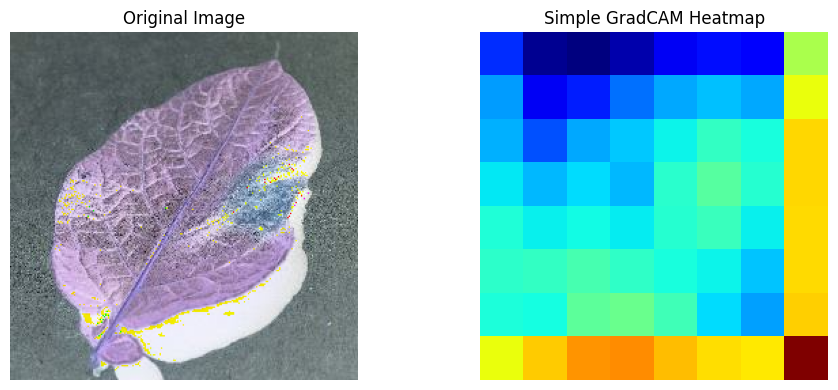

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2

class GradCAMPlusPlus:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output.shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM++.")


    def compute_simple_gradcam(self, image):
        gradModel = Model(inputs=[self.model.inputs],
                          outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        grads = tape.gradient(loss, convOutputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        heatmap = tf.reduce_sum(pooled_grads * convOutputs, axis=-1)
        heatmap = np.maximum(heatmap, 0)

        max_value = np.max(heatmap)
        if max_value != 0:  
            heatmap /= max_value

        return heatmap[0]

 Assuming your image and model are loaded
for image_batch, label_batch in train_ds.take(1):
    image = image_batch.numpy()

preds = model.predict(image)
i = np.argmax(preds[0])

cam_simple = GradCAMPlusPlus(model, i)
heatmap_simple = cam_simple.compute_simple_gradcam(image)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
display_image = (image[0]*255).astype('uint8')
plt.imshow(display_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(heatmap_simple, cmap='jet')
plt.title('Simple GradCAM Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 31ms/step


<ipython-input-23-3c1607aac48d>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


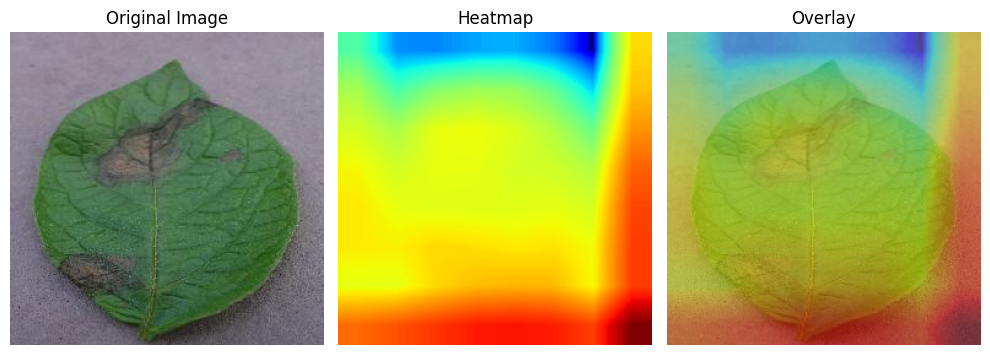

In [ ]:
'''for image_batch, label_batch in train_ds.take(1):
    image = image_batch.numpy()
preds = model.predict(image)
i = np.argmax(preds[0])
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)'''
import matplotlib.cm as cm

for image_batch, label_batch in train_ds.take(1):
    image = image_batch.numpy()

preds = model.predict(image)
i = np.argmax(preds[0])
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

heatmap = np.power(heatmap, 0.5)

jet = cm.get_cmap('jet')
jet_heatmap = np.uint8(jet(heatmap)[:, :, :3] * 255)

superimposed_img = jet_heatmap * 0.5 + image[0] * 0.5
superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)



# Plotting
plt.figure(figsize=(10, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(image[0].astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

# Plot heatmap only
plt.subplot(1, 3, 2)
plt.imshow(jet_heatmap)
plt.title('Heatmap')
plt.axis('off')

# Plot image with heatmap overlay
plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()



1/1 [==============================] - 0s 36ms/step
Predicted class: 1, Probability: 0.628351628780365


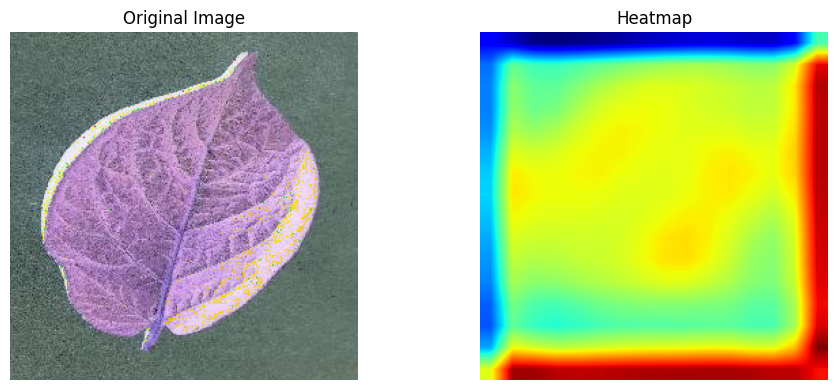

In [ ]:
for image_batch, label_batch in train_ds.take(1):
    image = image_batch.numpy()

# Predictions and GradCAM
preds = model.predict(image)
i = np.argmax(preds[0])
print(f"Predicted class: {i}, Probability: {preds[0][i]}")  # To ensure that the model is predicting with confidence

# Specify a different layer for GradCAM if the automatically chosen one is not producing meaningful heatmaps
layer_name = "block5_conv3"  # This is just an example, you might want to adjust it based on your model architecture
cam = GradCAM(model, i, layerName=layer_name)
heatmap = cam.compute_heatmap(image)

# Adjusting heatmap values for better visualization
heatmap = np.maximum(heatmap, 0)  # Removing any negative values
heatmap = heatmap.astype('float32')  # Ensure heatmap is float32 for division
if np.max(heatmap) != 0:  # Avoid division by zero
    heatmap /= np.max(heatmap)  # Normalizing to [0, 1]
heatmap = (heatmap * 255).astype("uint8")  # Scale to [0, 255] and convert to uint8

# Plotting
plt.figure(figsize=(10, 4))

# Plot original image
plt.subplot(1, 2, 1)
display_image = (image[0] * 255).astype('uint8')
plt.imshow(display_image)
plt.title('Original Image')
plt.axis('off')

# Plot heatmap
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='jet')
plt.title('Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()
